<a href="https://colab.research.google.com/github/EmanSalah2000/AutoEncoderCircle/blob/main/Auto_Encoder_Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random as rn
import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import LeakyReLU
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
print(tf.__version__)


Using TensorFlow backend.


2.2.0


In [ ]:
data=pd.read_csv('Geom(1).csv')
print(data.shape)
x_train=data.iloc[:17,:]
x_test=data.iloc[17:,:]
print(x_train.shape)
print(x_test.shape)
# x_train.reshape(len(x_train))
# x_test.reshape(len(x_test))

(22, 122)
(17, 122)
(5, 122)


In [ ]:
encoding_dim = 30 # 30,60
input_circle = keras.Input(shape=(122,))
encoded = layers.Dense(encoding_dim)(input_circle) # default alpha =0.3 
tf.keras.activations.relu(encoded, alpha=0.3, max_value=None, threshold=0.0) # alpha 0.2   0.3
decoded = layers.Dense(122)(encoded) # default alpha =0.3
tf.keras.activations.relu(decoded, alpha=0.3, max_value=None, threshold=0.0) # alpha 0.2   0.3
# big model
autoencoder = keras.Model(input_circle, decoded)
# encoder 
encoder = keras.Model(input_circle, encoded)
# decoder 
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile( loss=(tf.keras.losses.mean_squared_error), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)) 

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=1,
                shuffle=False,
                validation_data=(x_test, x_test))

encoded_circle = encoder.predict(x_test)
decoded_circle = decoder.predict(encoded_circle)

Train on 17 samples, validate on 5 samples
Epoch 1/10
17/17 [==============================] - 0s 16ms/step - loss: 6596.6632 - val_loss: 3904.9039
Epoch 2/10
17/17 [==============================] - 0s 2ms/step - loss: 2478.5492 - val_loss: 1369.4732
Epoch 3/10
17/17 [==============================] - 0s 2ms/step - loss: 724.5919 - val_loss: 294.9928
Epoch 4/10
17/17 [==============================] - 0s 2ms/step - loss: 133.1814 - val_loss: 35.9917
Epoch 5/10
17/17 [==============================] - 0s 2ms/step - loss: 14.6765 - val_loss: 4.8601
Epoch 6/10
17/17 [==============================] - 0s 2ms/step - loss: 2.3167 - val_loss: 0.8292
Epoch 7/10
17/17 [==============================] - 0s 3ms/step - loss: 0.4093 - val_loss: 0.1616
Epoch 8/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0857 - val_loss: 0.0305
Epoch 9/10
17/17 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.0040
Epoch 10/10
17/17 [==============================] - 0

In [ ]:
def visualization(raw,color):
  # print(raw.shape)
  # print(len(raw))
  # print(raw.iloc[:,1])
  big_x=[]
  big_y=[]
  for i in range(np.shape(raw)[1]) :
      if i%2 ==0 :
        big_x.append(raw.iloc[:,i])
      else :
        big_y.append(raw.iloc[:,i])
  plt.xlim([-200,200])
  plt.ylim([-200,200])
  plt.scatter(big_x,big_y,color=color)
 

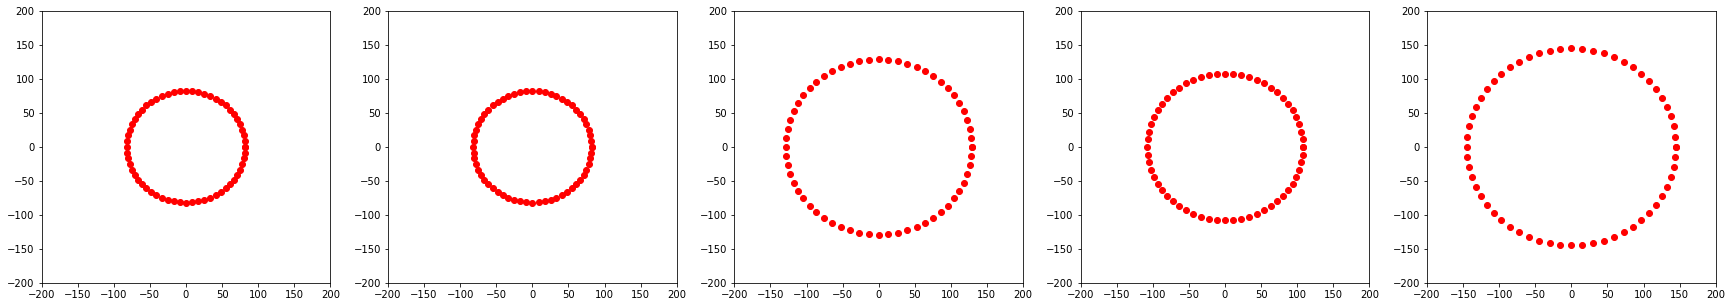

In [ ]:
n=5
plt.figure(figsize=(30, 5))
for i in range(n):
    plt.subplot(1, n, i+1)
    visualization(data.iloc[i:i+1,:],'red')

plt.show()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


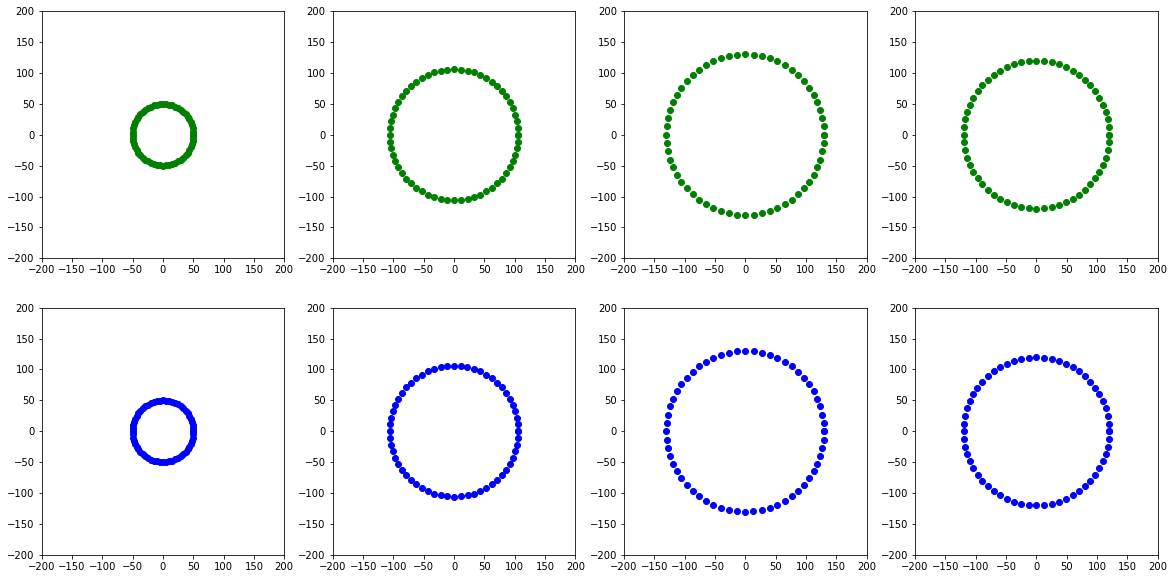

In [ ]:
n = 4  # How many digits we will display
plt.figure(figsize=(20, 10))
decoded_circle=pd.DataFrame(decoded_circle)
encoded_circle=pd.DataFrame(encoded_circle)
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    visualization(x_test.iloc[i:i+1,:],'green')
    print(type(x_test))
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    
    visualization(decoded_circle.iloc[i:i+1,:],'blue')
    #visualization(decoded_circle[i])
   
plt.show()

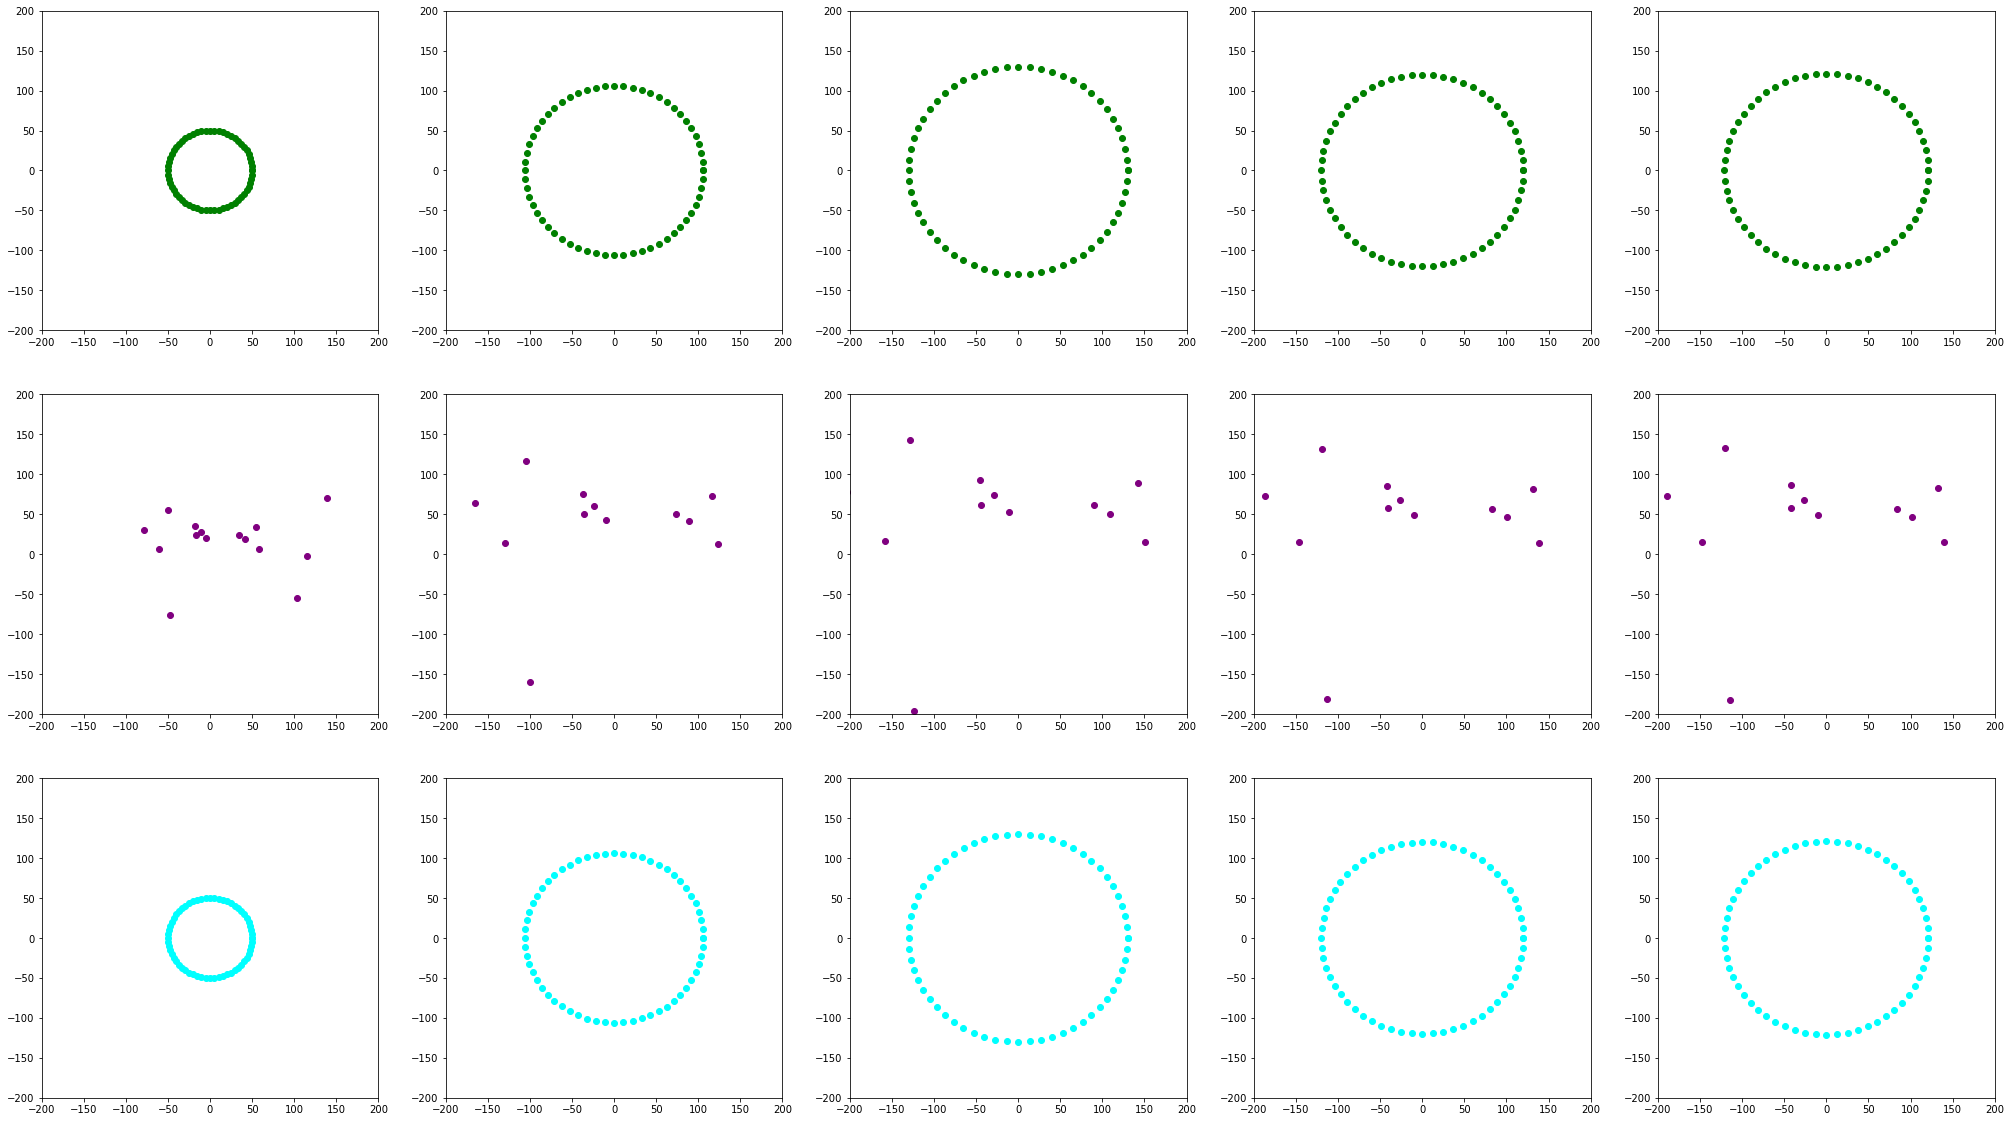

In [ ]:
n = 5 # How many digits we will display
plt.figure(figsize=(35, 20))
for i in range(n):
    # Display original
     ax = plt.subplot(3, n, i + 1)
     visualization(x_test.iloc[i:i+1,:],'green')

    # Display original
     ax = plt.subplot(3, n, i + 1+n)
     visualization(encoded_circle.iloc[i:i+1,:],'purple')
   

    # Display reconstruction
     ax = plt.subplot(3, n, i + 1 + 2*n)
     visualization(decoded_circle.iloc[i:i+1,:],'aqua')
plt.show()

In [ ]:

for i in range(n):
    print(tf.keras.losses.mean_squared_error(x_test.iloc[i:i+1,:],decoded_circle.iloc[i:i+1,:]))
    

tf.Tensor([0.00053807], shape=(1,), dtype=float32)
tf.Tensor([0.00065345], shape=(1,), dtype=float32)
tf.Tensor([0.00103742], shape=(1,), dtype=float32)
tf.Tensor([0.00085331], shape=(1,), dtype=float32)
tf.Tensor([0.00086997], shape=(1,), dtype=float32)
